## Class object mlclusters with geno file

Here I used an example geno file instead of a generated dataset (see mlclusters_nb_simulated_data.ipynb) to run the class object mlclusters.

__INDEX:__

```
1. Import libraries
2. Run class object mlclusters
3. Open an example geno file
4. Transpose the array : (X, Y) --> (Y, X)
5. Change missing values 9s to nan
6. Initialize missing values to their column means 
	a. detect cells that are not numbers like nan (e.g. numbers =TRUE, nan=FALSE)
	b. Compute the arithmetic mean long the specific axis( each loci (column)
	c. If TRUE assign x otherwise assign mu (average value)
7. Transform the array(normalization) - scaler.transform(X)
8. Fit the kmean model
9. Performance evaluation try y label with simulated. and not simulated
10. Plot data
```

### 1. Import libraries

In [2]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics

### 2. Run class object mlclusters
I created a class object called mlclusters which fits a KMeans clustering method, evaluate the clustering performance, and plot. 

In [3]:
class Mlclusters:
    
    def __init__(self, ddrad, n_cluster):
        
        self.ddrad = ddrad
        self.n_cluster = n_cluster
        self.kmeans_labels = self._fit_kmeans
        self.evaluate_performance = self._evaluate_performance
        self.plot_kmeans = self._plot_kmeans
         

    # private functions
    def _fit_kmeans(self):
        """
        Fit Kmeans clustering method 
        """  
        kmeans_model = KMeans(self.n_cluster, random_state=1).fit(self.ddrad)
        labels = kmeans_model.labels_
        return labels
    
        
    def _evaluate_performance(self):
        """
        Evaluate clustering performace using Silhouette Coefficient and Calinski-Harabaz Index
        """  
        s_score = metrics.silhouette_score((self.ddrad), self.kmeans_labels(), metric='euclidean')
        ch_score = metrics.calinski_harabaz_score((self.ddrad), self.kmeans_labels())

        return pd.Series(
            {"Silhouette Coefficient": s_score,
             "Calinski-Harabaz Index": ch_score,
            })
    
    
    def _plot_kmeans(self):
        """
        Creating a visual plot
        """  

        # Compute clustering with KMeans

        k_means = KMeans(self.n_cluster, init='k-means++', n_init=10)
        k_means.fit(self.ddrad)

        # The following bandwidth can be automatically detected using

        labels = k_means.labels_
        cluster_centers = k_means.cluster_centers_

        labels_unique = np.unique(labels)
        n_clusters_ = len(labels_unique)

        # Plot result
        plt.figure(1)
        plt.clf() # Clear the current figure.

        colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
        for k, col in zip(range(n_clusters_), colors):
            my_members = labels == k
            cluster_center = cluster_centers[k]
            plt.plot(self.ddrad[my_members, 0], self.ddrad[my_members, 1], col + '.')
            plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()   
    
        # public function


### 3. Open an example geno file


In [4]:
geno = "/Users/teachinghouse/PDSB/mlclusters/data/example.geno"

In [5]:
with open(geno) as indata:
    idata = indata.read()

In [6]:
idata = np.array([list(i) for i in idata.split()], dtype=float)

In [7]:
idata

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 1.],
       [2., 2., 2., ..., 0., 0., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 0.]])

In [9]:
idata.shape

(9405, 12)

### 4. Transpose the array : (X, Y) --> (Y, X)

In [8]:
idata.T

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 0., ..., 2., 2., 2.],
       [2., 2., 0., ..., 2., 2., 2.],
       [2., 1., 2., ..., 2., 2., 0.]])

In [10]:
idata.T.shape

(12, 9405)

### 5. Change missing values 9s to nan

In [11]:
# check for any missing data. 9s are missing data
np.any(idata==9)

True

In [13]:
# replace 9 with non
idata[idata==9] = np.nan
#data = data.astype(int)

In [14]:
# check for any missing data
np.any(np.isnan(idata))

True

In [18]:
idata

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 1.],
       [2., 2., 2., ..., 0., 0., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 0.]])

### 6. Initialize missing values to their column means 
	a. detect cells that are not numbers like nan (e.g. numbers =TRUE, nan=FALSE)
	b. Compute the arithmetic mean long the specific axis( each loci (column)
	c. If TRUE assign x otherwise assign mu (average value)

In [20]:
missing = ~np.isfinite(idata)  #Test element-wise for finiteness (not infinity or not Not a Number).
mu = np.nanmean(idata, 0, keepdims=1) #Compute the arithmetic mean along the specified axis, ignoring NaNs. Returns the average of the array elements (each column).
X_hat = np.where(missing, mu, idata) # numpy.where(condition[,x,y]) condition: when True, yield  x otherwise yeid y


In [21]:
X_hat

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 1.],
       [2., 2., 2., ..., 0., 0., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 0.]])

### 7. Transform the array (normalization) - scaler.transform(X)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_hat)
Xt = scaler.transform(X_hat)
Xt

array([[ 0.34919861,  0.34774567,  0.34839436, ...,  0.40028964,
         0.40056073,  0.40078169],
       [ 0.34919861,  0.34774567,  0.34839436, ...,  0.40028964,
         0.40056073, -1.15979006],
       [ 0.34919861,  0.34774567,  0.34839436, ..., -2.69968536,
        -2.71365791,  0.40078169],
       ...,
       [ 0.34919861,  0.34774567,  0.34839436, ...,  0.40028964,
         0.40056073,  0.40078169],
       [ 0.34919861,  0.34774567,  0.34839436, ...,  0.40028964,
         0.40056073,  0.40078169],
       [ 0.34919861,  0.34774567,  0.34839436, ...,  0.40028964,
         0.40056073, -2.72036181]])

### 5. Transpose the matrix

In [21]:
idata.T

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 0., ..., 2., 2., 2.],
       [2., 2., 0., ..., 2., 2., 2.],
       [2., 1., 2., ..., 2., 2., 0.]])

In [23]:
idata.T.shape

(12, 9405)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iX = idata.T

In [37]:
scaler.fit(iX)
Xt = scaler.transform(iX)
Xt

array([[ 0.30151134,  0.30151134,  0.57735027, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134,  0.30151134,  0.57735027, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134,  0.30151134,  0.57735027, ...,  0.30151134,
         0.30151134, -0.20227835],
       ...,
       [ 0.30151134,  0.30151134, -1.73205081, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134,  0.30151134, -1.73205081, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134, -3.31662479,  0.57735027, ...,  0.30151134,
         0.30151134, -1.17321442]])

In [ ]:
### 8. Fit the kmean model

In [28]:
# Creat an object 
ifish = Mlclusters(Xt, 3)
# return clustering labels
ifish.kmeans_labels()

array([0, 0, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
### 9. Performance evaluation try y label with simulated. and not simulated

In [29]:
ifish.evaluate_performance()

Calinski-Harabaz Index    2186.253156
Silhouette Coefficient       0.375977
dtype: float64

##### Silhouette Coefficient 
* The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
* The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

##### Calinski-Harabaz Index
* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
The score is fast to compute
* The Calinski-Harabaz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [ ]:
### 10. Plot data

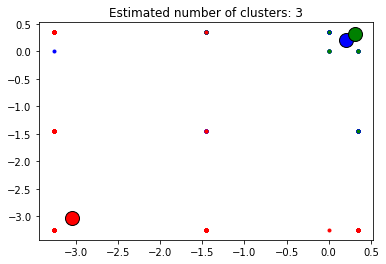

In [30]:
ifish.plot_kmeans()

In [33]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

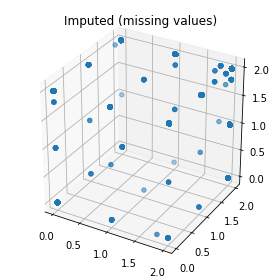

In [42]:

# plot the inferred points, color-coded according to the true cluster labels
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})

ax.scatter3D(X_hat[:, 0], X_hat[:, 1], X_hat[:, 2],
                cmap='gist_rainbow')
ax.set_title('Imputed (missing values)')
fig.tight_layout()

TypeError: 'PathCollection' object is not iterable

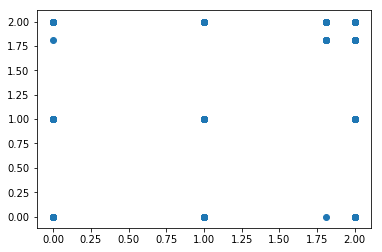

In [43]:
fig, ax = plt.scatter(X_hat[:, 0], X_hat[:, 1])



Previous redults without normalization

In [56]:
#ifish.evaluate_performance()

Calinski-Harabaz Index    1.845193
Silhouette Coefficient    0.046620
dtype: float64

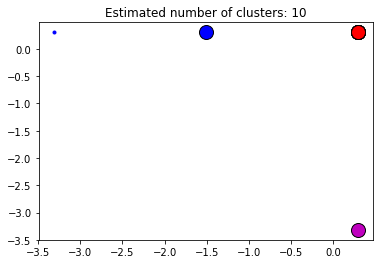

In [57]:
#ifish.plot_kmeans()